In [39]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [40]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [41]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [42]:
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
#tradeable

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [43]:
list_of_tickers = ["SPY", "AGG"]
tickers = ["SPY", "AGG"]
# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for AAPL
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.head()

AGG                                       \
                             open     high       low    close   volume   
2019-11-22 00:00:00-05:00  112.89  112.900  112.7605  112.850  2233649   
2019-11-25 00:00:00-05:00  112.91  113.010  112.8900  112.980  2848536   
2019-11-26 00:00:00-05:00  113.11  113.159  113.0800  113.120  2104446   
2019-11-27 00:00:00-05:00  113.03  113.070  112.9600  112.995  1844546   
2019-11-29 00:00:00-05:00  113.01  113.020  112.8500  112.925  2123435   

                              SPY                                    
                             open    high     low   close    volume  
2019-11-22 00:00:00-05:00  310.90  311.24  309.85  311.00  32532889  
2019-11-25 00:00:00-05:00  311.98  313.37  311.98  313.35  37229034  
2019-11-26 00:00:00-05:00  313.41  314.28  313.06  314.02  30435576  
2019-11-27 00:00:00-05:00  314.61  315.47  314.37  315.46  34799247  
2019-11-29 00:00:00-05:00  314.86  315.13  314.06  314.27  24780428

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [44]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,AGG,SPY
,close,close
2019-11-22 00:00:00-05:00,112.850,311.00
2019-11-25 00:00:00-05:00,112.980,313.35
2019-11-26 00:00:00-05:00,113.120,314.02
2019-11-27 00:00:00-05:00,112.995,315.46
2019-11-29 00:00:00-05:00,112.925,314.27


In [45]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
2019-11-22 00:00:00-05:00,NaN,NaN
2019-11-25 00:00:00-05:00,0.001152,0.007556
2019-11-26 00:00:00-05:00,0.001239,0.002138
2019-11-27 00:00:00-05:00,-0.001105,0.004586
2019-11-29 00:00:00-05:00,-0.000619,-0.003772


In [46]:
# Calculate volatility
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg

0.0004199314674897256

In [47]:
# Use the `std` function to calculate the standard deviation of daily returns for `AGG` and `SPY`, respectively
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_spy

0.030315930449348896

In [48]:
# Save the last day's closing price
# Set last closing prices of `AGG` and `SPY`
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

In [49]:
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [50]:
# Setup the Monte Carlo Parameters
num_simulations = 500
num_trading_days = 252 * 30
monte_carlo = pd.DataFrame()

In [53]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    # Initialize the simulated prices list with the last closing price of `JNJ` and `MU`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_trading_days):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% AGG; 40% SPY)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991129,0.995782,0.984139,0.998862,1.030930,1.021304,0.988799,1.003642,1.028744,1.033563,...,0.988807,1.020403,1.027580,1.003786,0.975112,0.990910,1.025830,1.005153,0.982218,0.988863
2,0.992716,0.989208,0.982926,1.007830,1.025114,1.011294,0.981793,0.996408,1.055993,1.020343,...,0.991257,1.018697,1.037910,1.023792,0.983581,0.971769,1.040213,1.001722,0.985439,1.017169
3,0.977102,0.981799,0.982065,1.008166,1.026757,1.026283,0.980813,0.998529,1.068242,1.014743,...,1.001098,1.018769,1.044948,1.011023,0.953205,0.996054,1.046187,0.987461,1.008297,1.028053
4,0.994973,0.972376,0.979804,1.021254,1.013944,1.048925,0.993958,0.978599,1.077742,1.020342,...,0.999622,1.037247,1.065663,1.024352,0.955825,1.014002,1.047496,0.982758,0.997054,1.016369


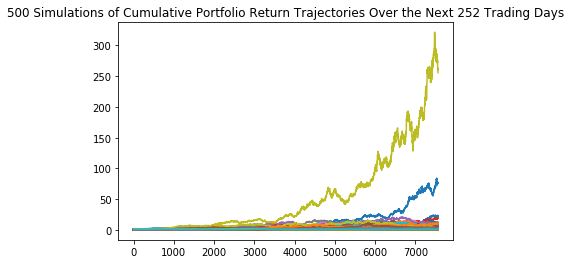

In [54]:
# Visualize the Simulation
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [56]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.head()

0    1.309113
1    0.815795
2    0.319513
3    2.140505
4    0.288111
Name: 7560, dtype: float64

In [ ]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

In [57]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.168755
0.95    7.526557
Name: 7560, dtype: float64

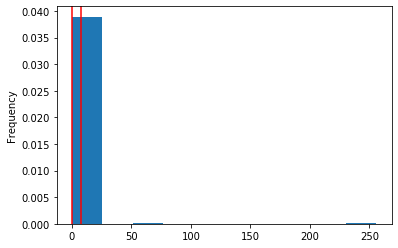

In [58]:
# Visualize the distribution of the ending returns
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [ ]:
# YOUR CODE HERE

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE